In [1]:
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
from datetime import datetime
from plotly.figure_factory import create_candlestick
import time
import matplotlib.pyplot as plt
import seaborn as sns
from calculator.talibWrapper import calculateTalib
%matplotlib inline
py.init_notebook_mode()

# Properties

In [2]:
dataRoot = 'D:\\Dropbox\\My work\\krypl-project\\dataLabeled\\poloniex\\5min'
featuresRoot = 'D:\\Dropbox\\My work\\krypl-project\\dataFeatures\\poloniex\\5min'

In [3]:
fileName = 'USDT_BTC_5min_2016-01-01_2017-12-31.tsv'
file = '{dataRoot}\\{fileName}'.format(dataRoot=dataRoot, fileName=fileName)
data = pd.read_csv(file, sep='\t').drop('index', axis=1)

# Bollinger Bands

In [18]:
def calculateBBands(history, col, timePeriod):
    dataDict = {'close': history[col].values}
    return calculateTalib('BBANDS', dataDict, {'timeperiod': timePeriod})

In [19]:
def numberValsInRow(series, currentI, val):
    cnt = 0
    for i in range(currentI, -1, -1):
        if series.iloc[i] != val:
            return cnt
        cnt += 1
    return cnt


def bbFeature(boolSeries):
    return boolSeries.to_frame().apply(lambda x: numberValsInRow(boolSeries, x.name, True), axis=1)


def bBandsFeatures(data, col, timePeriod):
    upper, middle, lower = calculateBBands(data, col, 20)
    data[col+'AboveBB'] = bbFeature(data[col] > pd.Series(upper))
    data[col+'BellowBB'] = bbFeature(data[col] < pd.Series(lower))
    return data

In [20]:
featured = data.copy()
timePeriod = 20
for col in ['open', 'close', 'high', 'low']:
    featured = bBandsFeatures(featured, col, timePeriod)

In [21]:
featured.head()

close   timestamp       high        low       open  quoteVolume  \
0  430.57315  1451602800  430.57315  430.57315  430.57315          0.0   
1  430.57315  1451603100  430.57315  430.57315  430.57315          0.0   
2  430.57315  1451603400  430.57315  430.57315  430.57315          0.0   
3  430.57315  1451603700  430.57315  430.57315  430.57315          0.0   
4  430.57315  1451604000  430.57315  430.57315  430.57315          0.0   

   volume  weightedAverage                 date  entryReturn_001     ...       \
0     0.0        430.57315  2016-01-01 00:00:00                0     ...        
1     0.0        430.57315  2016-01-01 00:05:00                0     ...        
2     0.0        430.57315  2016-01-01 00:10:00                0     ...        
3     0.0        430.57315  2016-01-01 00:15:00                0     ...        
4     0.0        430.57315  2016-01-01 00:20:00                0     ...        

   entryReturn_28  entryReturn_3  openAboveBB  openBellowBB  closeAboveBB  \
0               0              0            0             0             0   
1               0              0            0             0             0   
2               0              0            0             0             0   
3               0              0            0             0             0   
4               0              0            0             0             0   

   closeBellowBB  highAboveBB  highBellowBB  lowAboveBB  lowBellowBB  
0              0            0             0           0            0  
1              0            0             0           0            0  
2              0            0             0           0            0  
3              0            0             0           0            0  
4              0            0             0           0            0  

[5 rows x 33 columns]

# Explore Feature

In [37]:
data.columns

Index(['close', 'timestamp', 'high', 'low', 'open', 'quoteVolume', 'volume',
       'weightedAverage', 'date', 'entryReturn_001', 'entryReturn_003',
       'entryReturn_006', 'entryReturn_01', 'entryReturn_03', 'entryReturn_05',
       'entryReturn_07', 'entryReturn_1', 'entryReturn_12', 'entryReturn_15',
       'entryReturn_18', 'entryReturn_2', 'entryReturn_22', 'entryReturn_25',
       'entryReturn_28', 'entryReturn_3'],
      dtype='object')

In [43]:
def plotDistb(data, label, feature):
    data0 = data[data[label] == 0]
    data1 = data[data[label] == 1]
    f, axarr = plt.subplots(1, 2, figsize=[15, 5])
    plt.suptitle('Label = %s Feature = %s' % (label, feature))
    sns.distplot(data0[feature], ax=axarr[0], kde=False)
    sns.distplot(data1[feature], ax=axarr[1], kde=False)

In [44]:
labels = ['entryReturn_1', 'entryReturn_12', 'entryReturn_15',
       'entryReturn_18', 'entryReturn_2', 'entryReturn_22', 'entryReturn_25',
       'entryReturn_28', 'entryReturn_3']

## Close

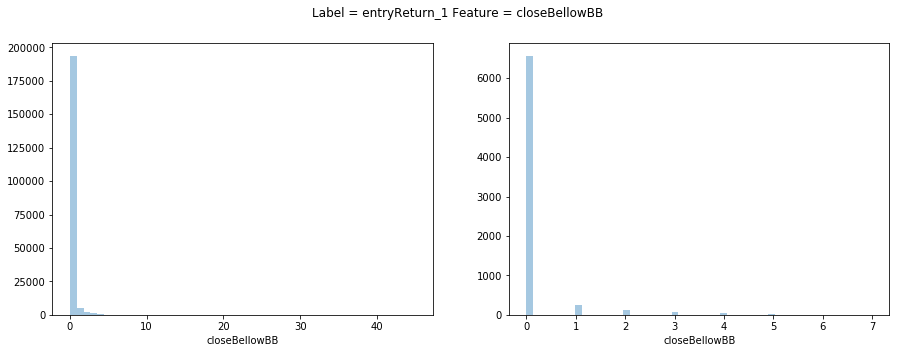

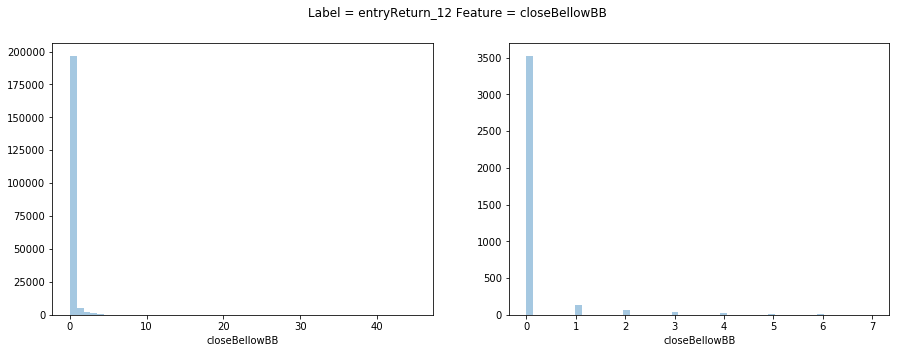

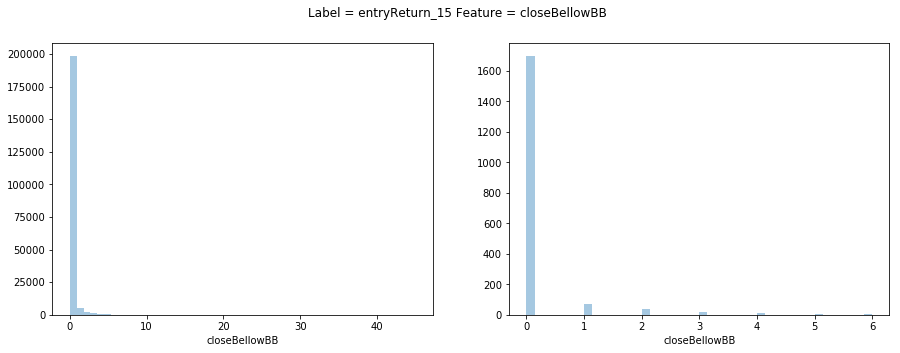

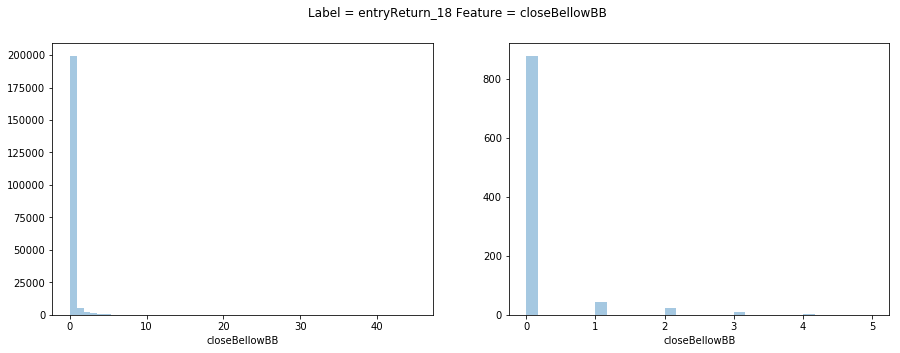

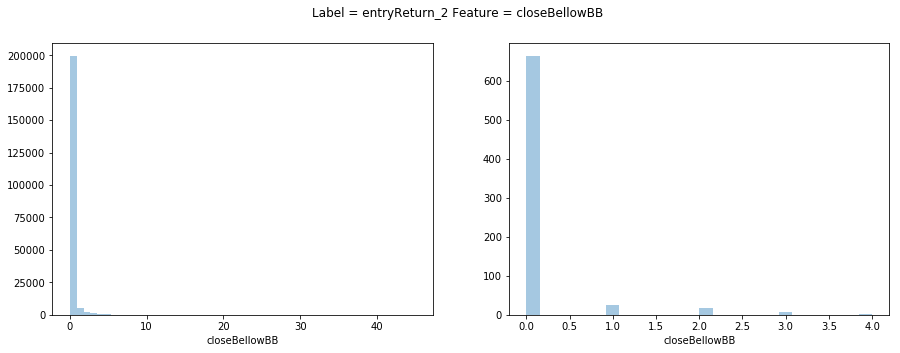

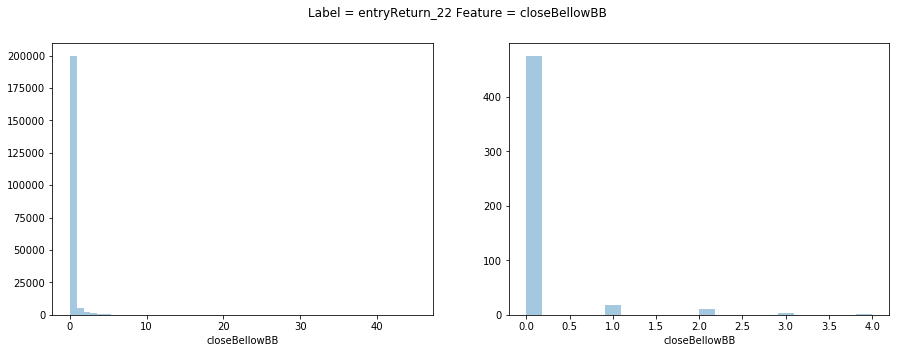

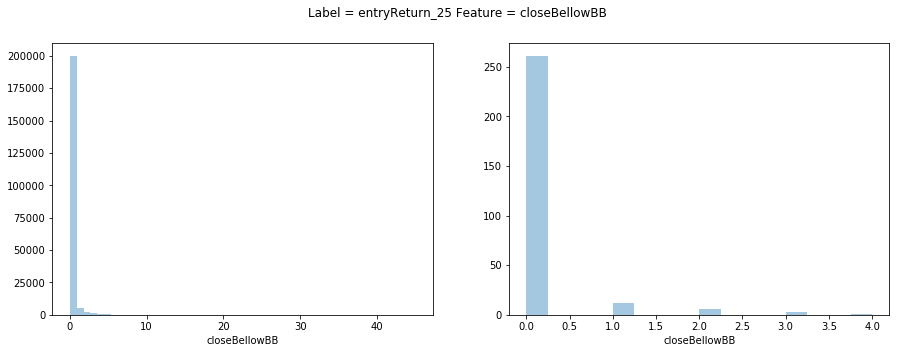

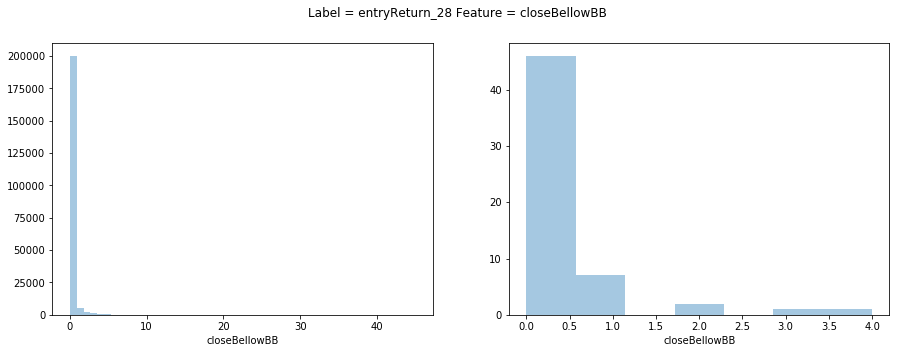

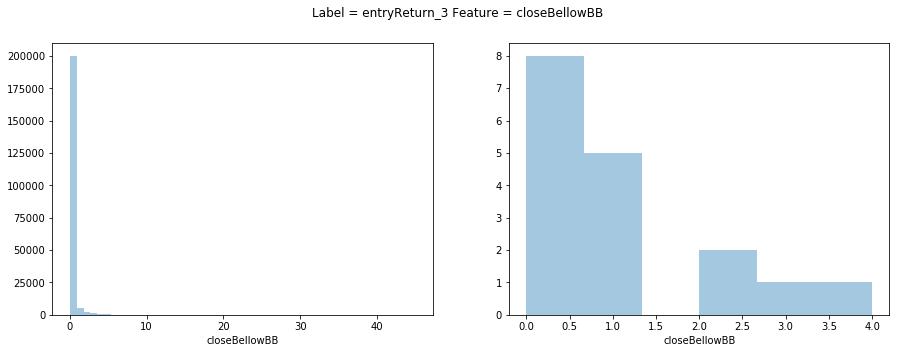

In [45]:
for label in labels:
    plotDistb(featured, label, 'closeBellowBB')

# Low

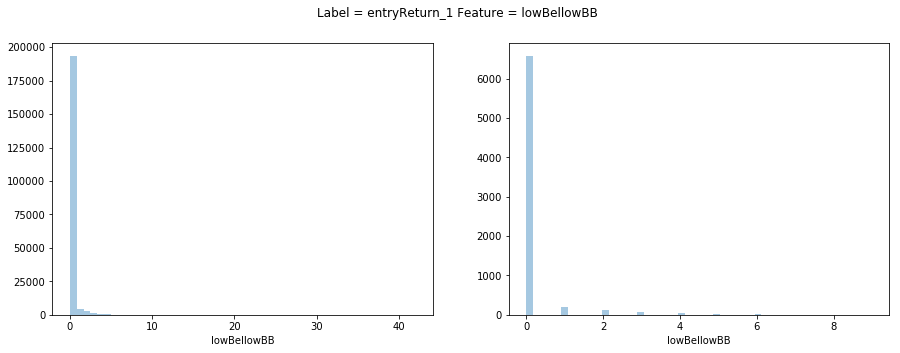

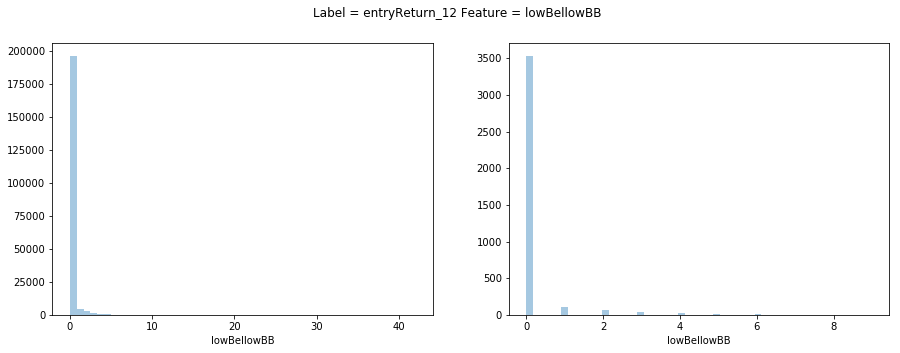

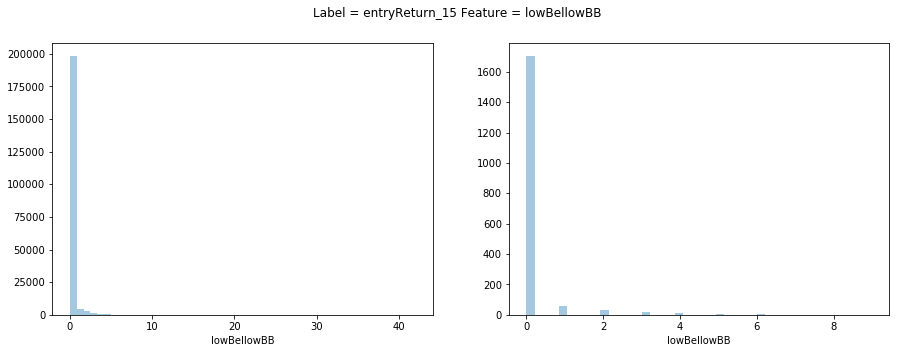

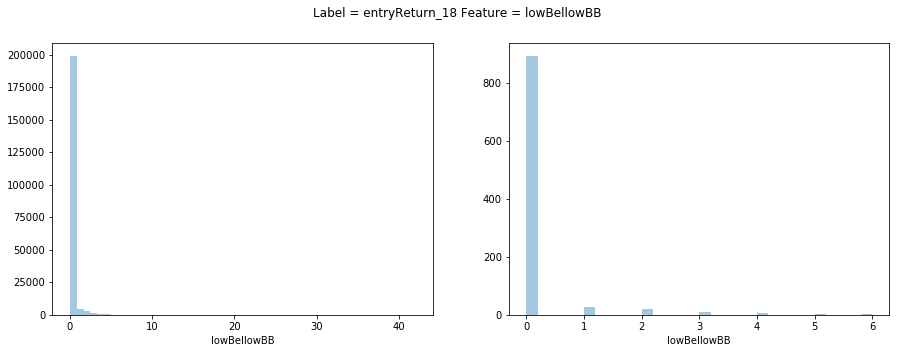

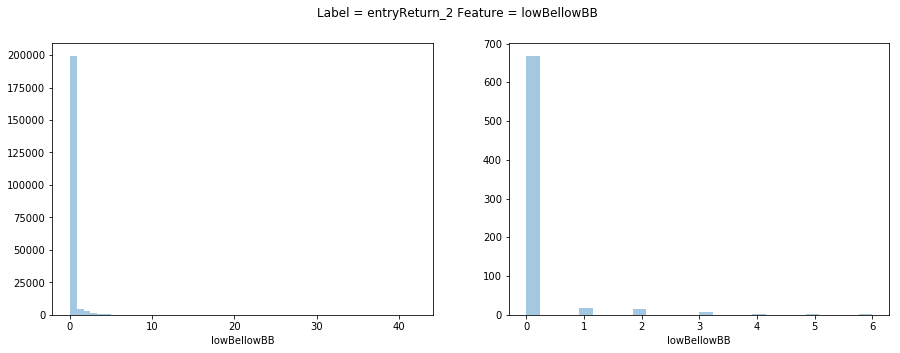

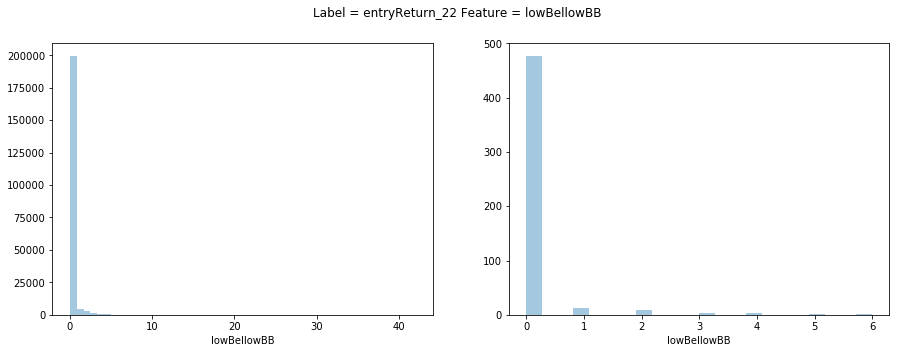

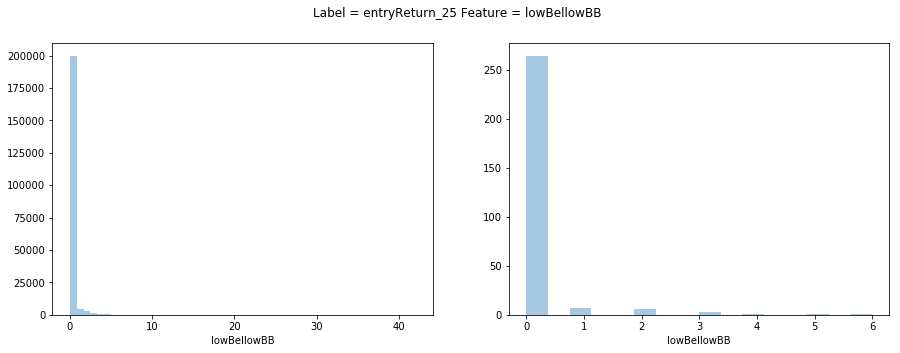

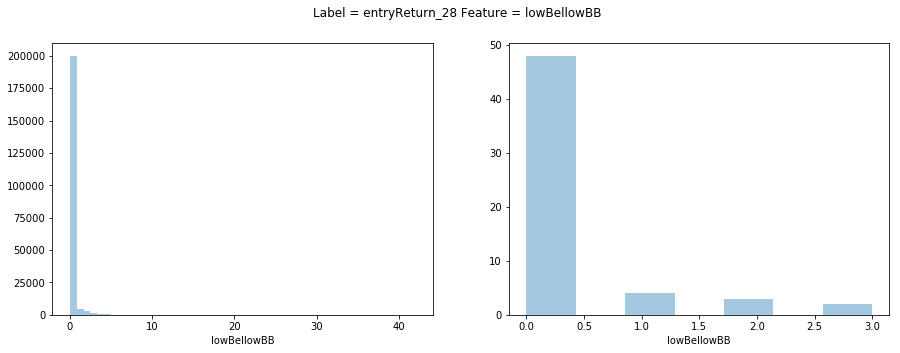

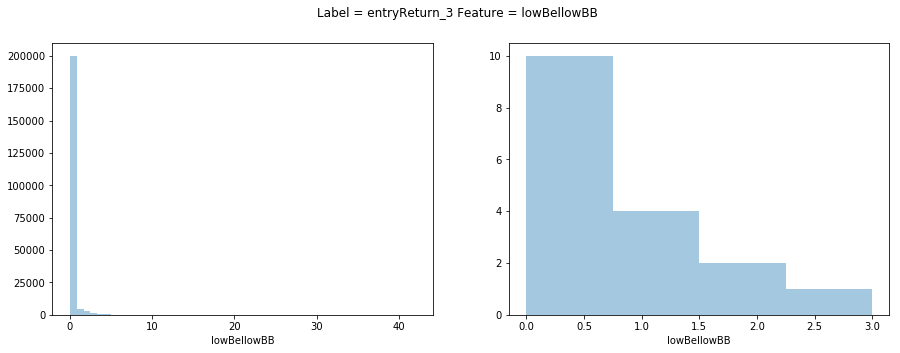

In [46]:
for label in labels:
    plotDistb(featured, label, 'lowBellowBB')

# Open

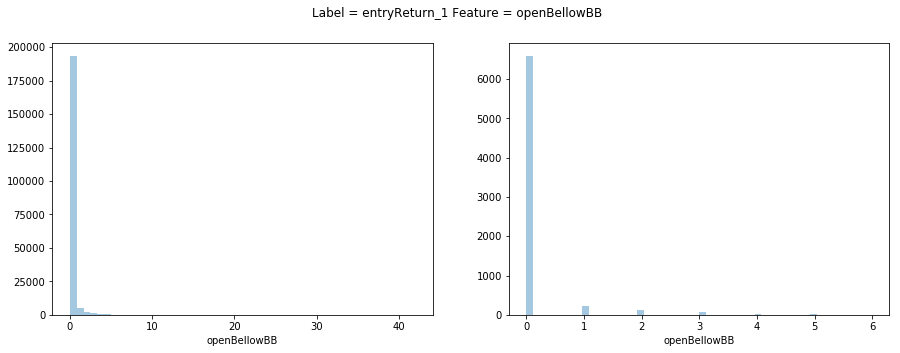

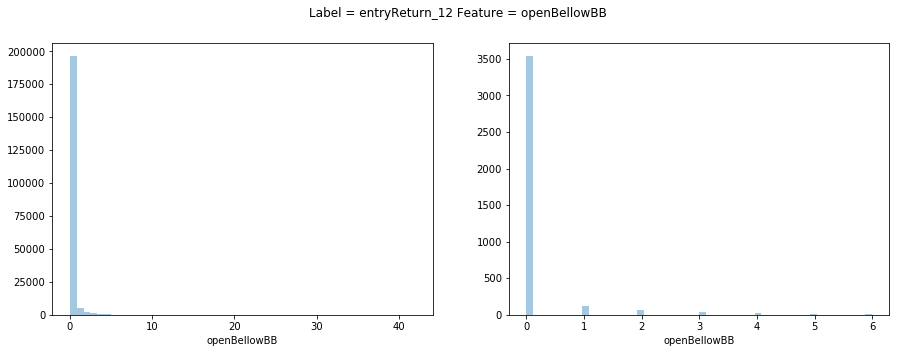

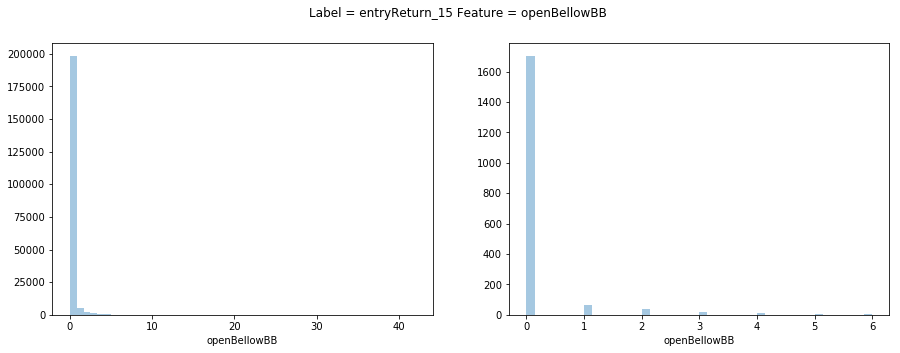

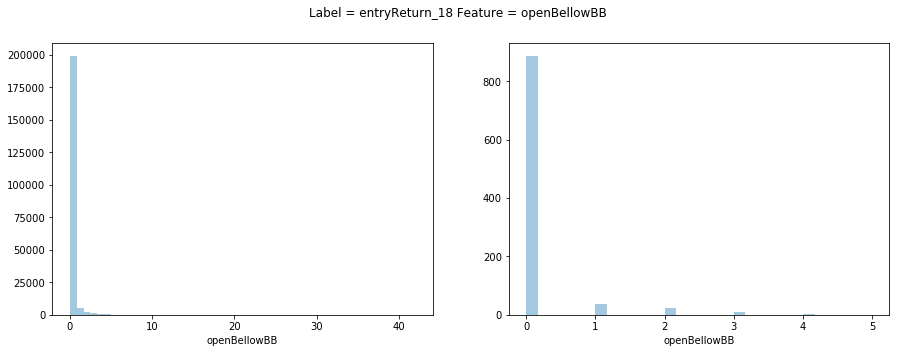

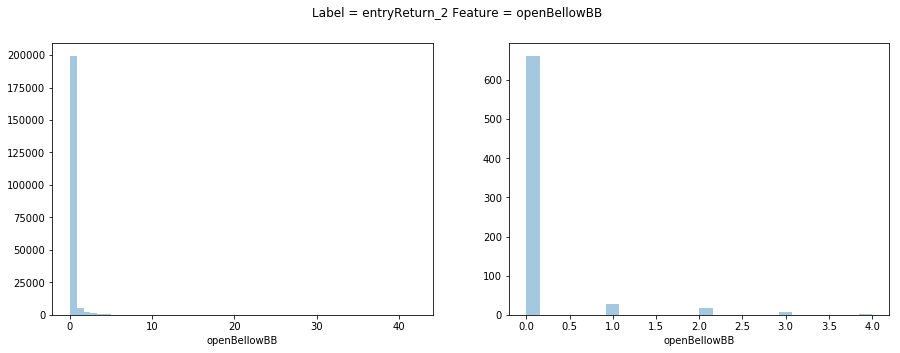

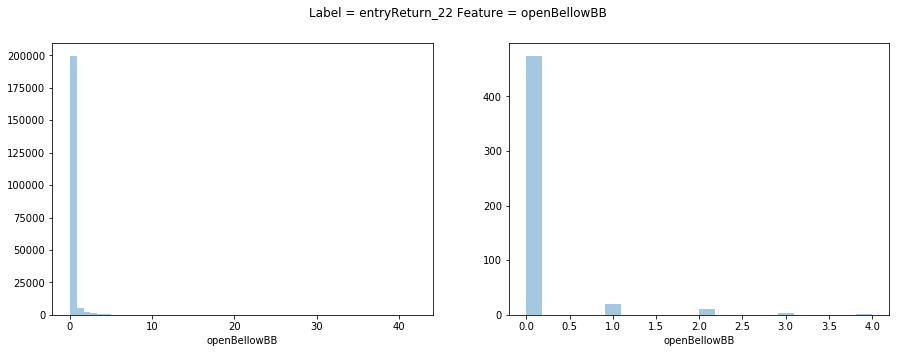

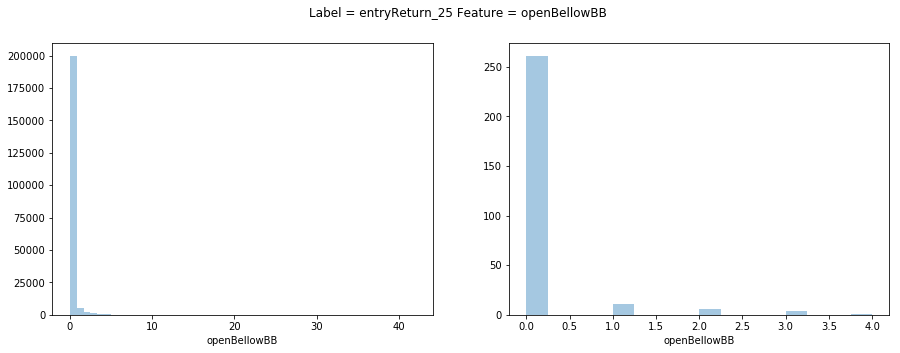

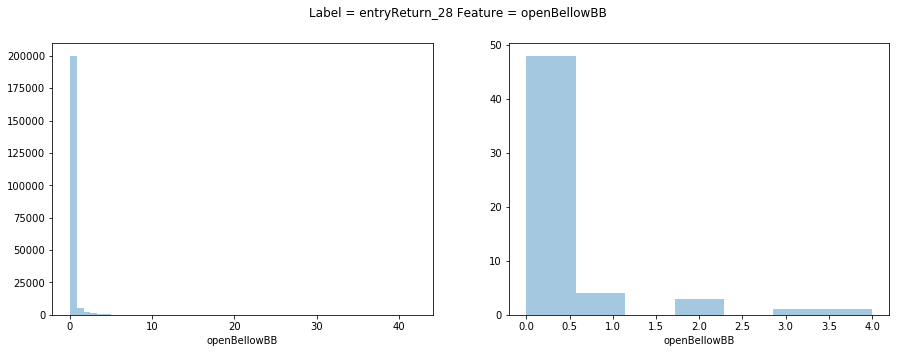

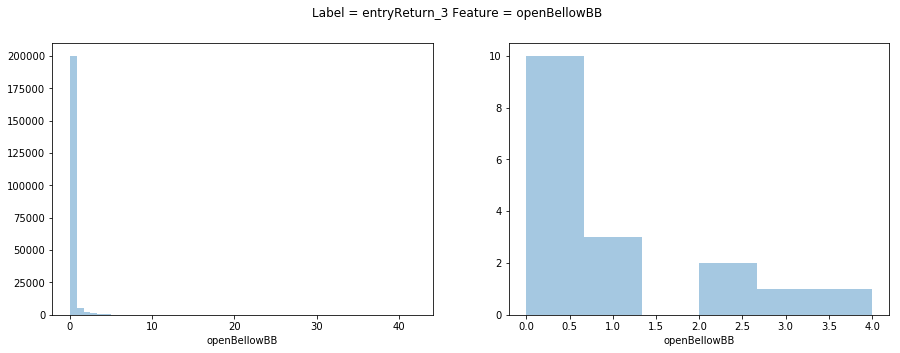

In [47]:
for label in labels:
    plotDistb(featured, label, 'openBellowBB')

# High 

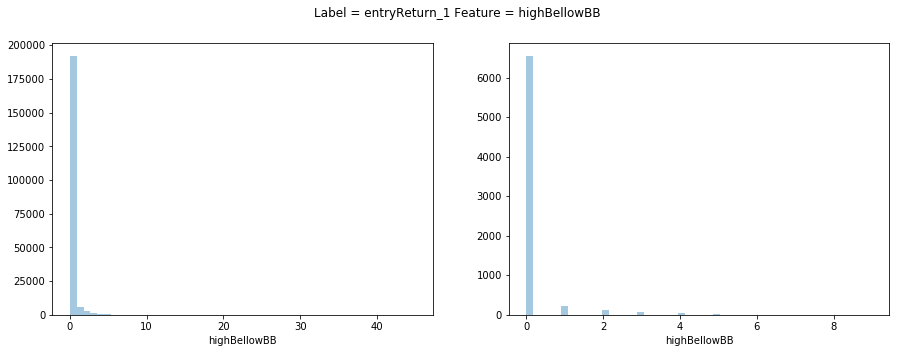

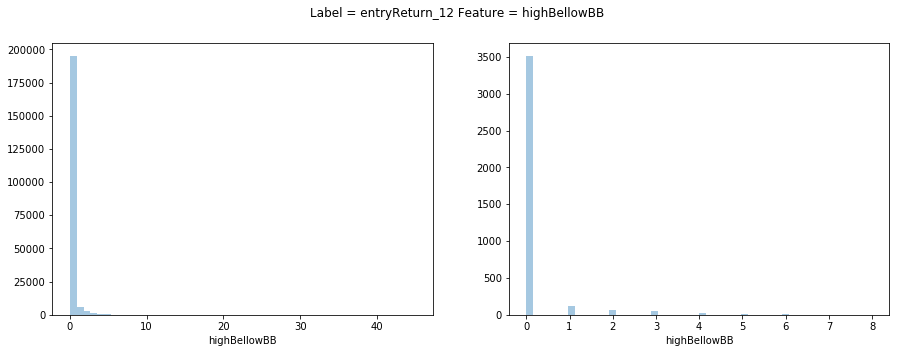

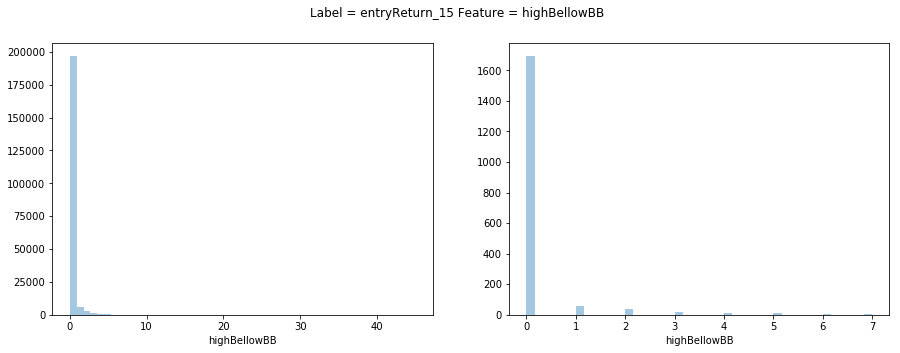

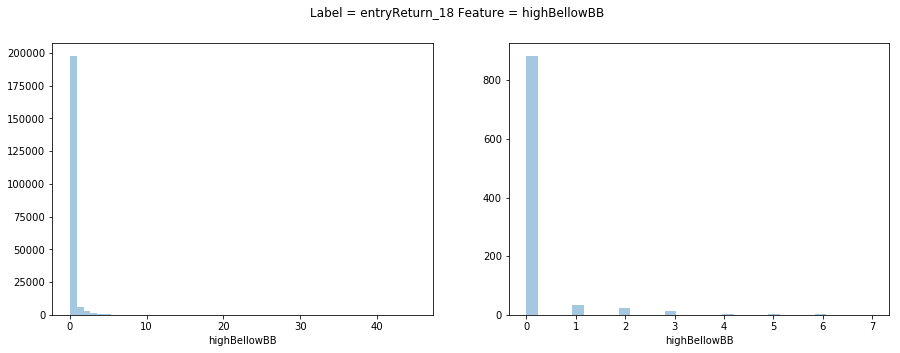

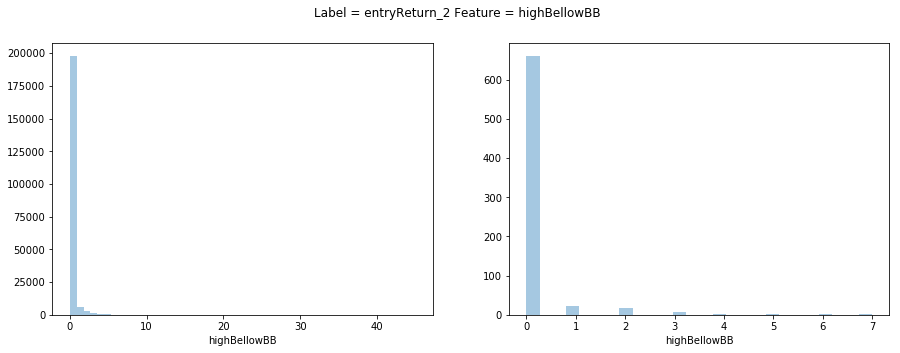

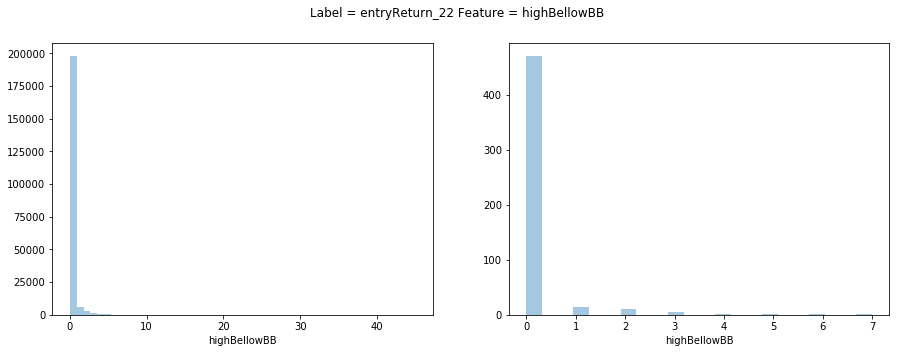

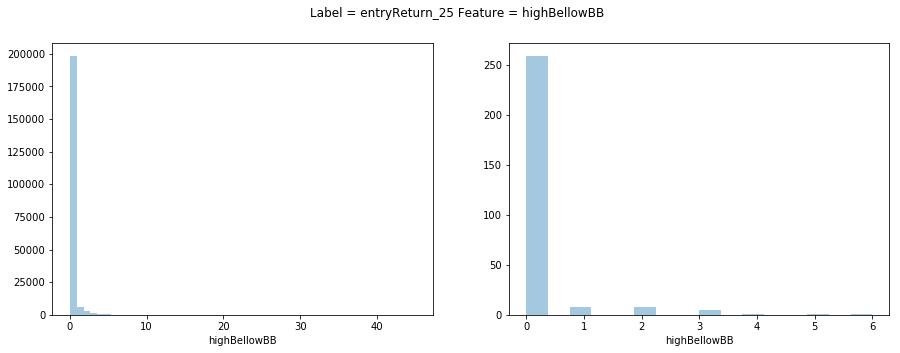

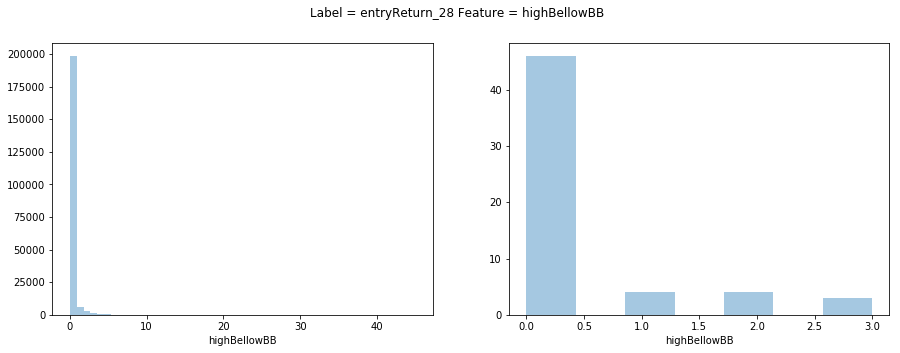

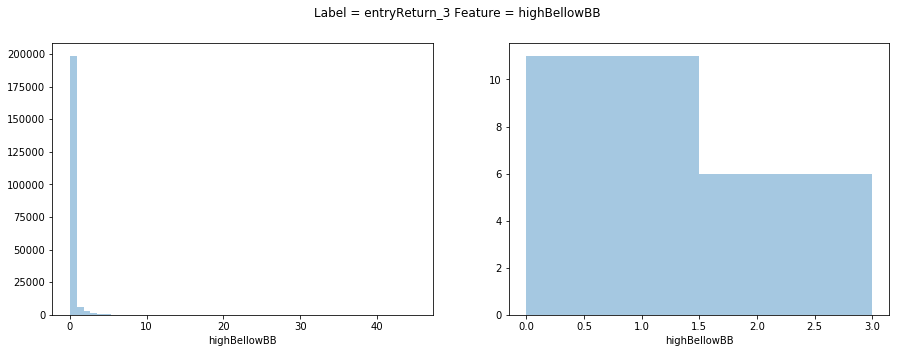

In [48]:
for label in labels:
    plotDistb(featured, label, 'highBellowBB')